# Hierarchical DBSCAN
This notebook shows simple examples of hierarchical DBSCAN using the same three blob example used for the hierarchical clustering and k-means example.

In [3]:
#!pip install hdbscan

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import hdbscan
import seaborn as sns

from sklearn.datasets import make_blobs

# we are using the scipy implementation
from scipy.spatial.distance import cdist, pdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, inconsistent

%matplotlib inline

np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

## Example Data
We generate some example data with three blobs. 

In [5]:
random_state = 1234 ## another interesting example can be generated using the seed 36
no_clusters = 3
no_samples = 1500

X, y = make_blobs(centers=no_clusters, n_samples=no_samples, random_state=random_state)

Let's plot the blobs!

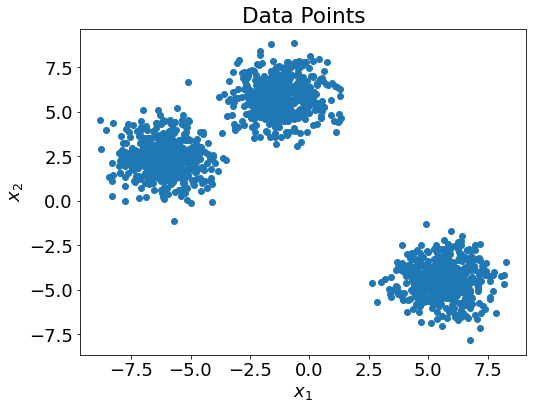

In [6]:
plt.figure(figsize=(8, 6));
font = {'family' : 'sans', 'size'   : 18}
plt.rc('font', **font)
plt.scatter(X[:,0],X[:,1], cmap=plt.get_cmap('Pastel1'));
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Data Points");

In [7]:
clusterer = hdbscan.HDBSCAN()

In [8]:
clusterer.fit(X)

HDBSCAN()

In [9]:
clusterer.labels_

array([1, 2, 0, ..., 1, 2, 1])

In [12]:
np.unique(clusterer.labels_)

array([-1,  0,  1,  2])

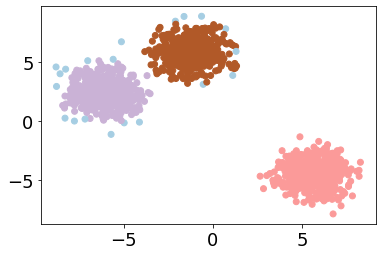

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=clusterer.labels_,cmap=plt.get_cmap('Paired'));

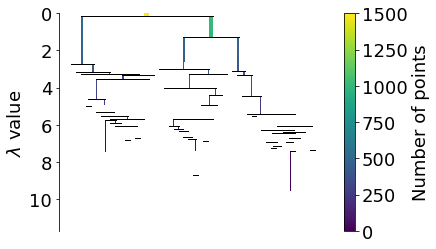

In [15]:
clusterer.condensed_tree_.plot()

First, we generate the dendrogram using single linkage. The matrix z contains one raw for every merge operation.

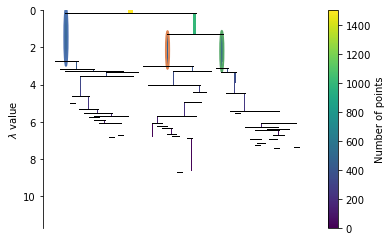

In [19]:
clusterer.condensed_tree_.plot(select_clusters=True,
                               selection_palette=sns.color_palette('deep', 8));

<AxesSubplot:ylabel='distance'>

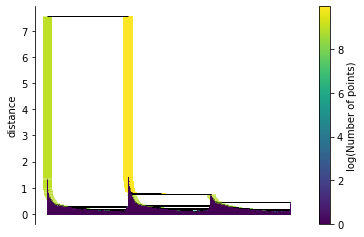

In [21]:
clusterer.single_linkage_tree_.plot();